## Passionate Investors and Cyberpunks. ERC20 Analysis

In [1]:
import pandas as pd
from math import log10

from config import PROJECT_ID, INITIAL_TS, SNAPSHOT_TS, \
    ETH_ANALYSIS_DATASET_NAME, ETH_ANALYSIS_DISTRIBUTION_TABLE_NAME, \
    ERC20_ANALYSIS_DATASET_NAME, ERC20_BALANCES_TABLE_NAME, ERC20_ANALYSIS_DISTRIBUTION_TABLE_NAME, \
    ERC20_TOKEN_METADATA_TABLE_NAME, STABLECOINS_LOVERS_TABLE_NAME, INVESTORS_AUDIENCE, CYBERPUNKS_AUDIENCE
from src.utils_bigquery import drop_table, create_table, create_table_from_df, get_df
from src.utils_charts import grade_boundaries_analysis

DROP_TABLES = True
CREATE_TABLES = True

### Distribution Rule. Passionate Investors

<table style="text-align: left">
    <thead style="text-align: center">
        <tr>
            <th rowspan=2></th>
            <th colspan=3>Grade</th>
        </tr>
        <tr>
            <th>1</th>
            <th>2</th>
            <th>3</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left"> Number of tokens >= 2 and ERC20 balance </td>
            <td> > 0.01 ETH </td>
            <td> > 6 ETH </td>
            <td> > 88 ETH </td>
        </tr>
    </tbody>
</table>

### Distribution Rule. Cyberpunks

<table style="text-align: left">
<thead style="text-align: center">
<tr>
<th rowspan=2></th>
<th colspan=3>Grade</th>
</tr>
<tr>
<th>1</th>
<th>2</th>
<th>3</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: left"> Owners of the Selected tokens </td>
<td> - </td>
<td> - </td>
<td> here </td>
</tr>
</tbody>
</table>

In [2]:
investors_min_number_of_tokens = 2
initial_boundary = 0.01

erc20_tokens_dict = {
    # name:           [address,                                      type,         ETH price,  decimals]
    'YFI':            ['0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e', 'investment', 17.2,      18],
    'FTM':            ['0x4e15361fd6b4bb609fa63c81a2be19d873717870', 'investment', 0.000256,  18],
    'AMPL':           ['0xd46ba6d942050d489dbd938a2c909a5d5039a161', 'investment', 0.000400,   9],
    'renBTC':         ['0xeb4c2781e4eba804ce9a9803c67d0893436bb27d', 'investment', 20.2,       8],
    'OCEAN':          ['0x967da4048cd07ab37855c090aaf366e4ce1b9f48', 'investment', 0.000480,  18],
    'RPL':            ['0xb4efd85c19999d84251304bda99e90b92300bd93', 'investment', 0.00669,   18],
    'UNI':            ['0x1f9840a85d5af5bf1d1762f925bdaddc4201f984', 'investment', 0.0143,    18],
    'KEEP3R':         ['0x1ceb5cb57c4d4e2b2433641b95dd330a33185a44', 'investment', 0.108,     18],
    'GST2':           ['0x0000000000b3f879cb30fe243b4dfee438691c04', 'investment', 0.0493,     2],
    'CHI':            ['0x0000000000004946c0e9f43f4dee607b0ef1fa1c', 'investment', 0.00101,    0],
    'MLN':            ['0xec67005c4e498ec7f55e092bd1d35cbc47c91892', 'investment', 0.0414,    18],
    'AAVE':           ['0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9', 'investment', 0.162,     18],
    'GLM':            ['0x7dd9c5cba05e151c895fde1cf355c9a1d5da6429', 'investment', 0.000162,  18],
    'ZRX':            ['0xe41d2489571d322189246dafa5ebde1f4699f498', 'investment', 0.000639,  18],
    'SNX':            ['0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f', 'investment', 0.00635,   18],
    'SUSHI':          ['0x6b3595068778dd592e39a122f4f5a5cf09c90fe2', 'investment', 0.00513,   18],
    'COMP':           ['0xc00e94cb662c3520282e6f5717214004a7f26888', 'investment', 0.261,     18],
    'BAL':            ['0xba100000625a3754423978a60c9317c58a424e3d', 'investment', 0.0218,    18],
    'GRT':            ['0xc944e90c64b2c07662a292be6244bdf05cda44a7', 'investment', 0.000583,  18],
    'MKR':            ['0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2', 'investment', 1.57,      18],
    'CRV':            ['0xd533a949740bb3306d119cc777fa900ba034cd52', 'investment', 0.00115,   18],
    'LPT':            ['0x58b6a8a3302369daec383334672404ee733ab239', 'investment', 0.0121,    18],
    'REL':            ['0xb6c4267c4877bb0d6b1685cfd85b0fbe82f105ec', 'investment', 0.00122,   18],
    'ANT':            ['0xa117000000f279d81a1d3cc75430faa017fa5a2e', 'investment', 0.00348,   18],
    'GEN':            ['0x543ff227f64aa17ea132bf9886cab5db55dcaddf', 'investment', 0.0000915, 18],
    'PNK':            ['0x93ed3fbe21207ec2e8f2d3c3de6e058cb73bc04d', 'investment', 0.0000682, 18],
    'REP':            ['0x221657776846890989a759ba2973e427dff5c9bb', 'investment', 0.0142,    18],
    'SNT':            ['0x744d70fdbe2ba4cf95131626614a1763df805b9e', 'investment', 0.0000629, 18],
    '2KEY':           ['0xE48972fCd82a274411c01834e2f031D4377Fa2c0', 'investment', 0.0000241, 18],
    'NU':             ['0x4fE83213D56308330EC302a8BD641f1d0113A4Cc', 'investment', 0.000184,  18],
    'MANA':           ['0x0f5d2fb29fb7d3cfee444a200298f468908cc942', 'investment', 0.000505,  18],
    'TORN':           ['0x77777feddddffc19ff86db637967013e6c6a116c', 'investment', 0.0412,    18],
    'XRT':            ['0x7de91b204c1c737bcee6f000aaa6569cf7061cb7', 'investment', 0.0152,     9],
    'FOAM':           ['0x4946fcea7c692606e8908002e55a582af44ac121', 'cyberpunk',  0.0000278, 18],
    'GOLD':           ['0x150b0b96933b75ce27af8b92441f8fb683bf9739', 'cyberpunk',  0.00000243,18],
    'Tether':         ['0xdac17f958d2ee523a2206206994597c13d831ec7', 'stablecoin', 0.000364,   6],
    'USD Coin':       ['0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48', 'stablecoin', 0.000364,   6],
    'Binance USD':    ['0x4fabb145d64652a948d72533023f6e7a623c7c53', 'stablecoin', 0.000364,  18],
    'DAI':            ['0x6b175474e89094c44da98b954eedeac495271d0f', 'stablecoin', 0.000364,  18],
    'Fei Protocol':   ['0x956f47f50a910163d8bf957cf5846d573e7f87ca', 'stablecoin', 0.000364,  18],
    'TerraUSD':       ['0xa47c8bf37f92abed4a126bda807a7b7498661acd', 'stablecoin', 0.000364,  18],
    'Liquity USD':    ['0x5f98805a4e8be255a32880fdec7f6728c6568ba0', 'stablecoin', 0.000364,  18],
    'Paxos Standard': ['0x8e870d67f660d95d5be530380d0ec0bd388289e1', 'stablecoin', 0.000364,  18],
    'TrueUSD':        ['0x0000000000085d4780b73119b644ae5ecd22b376', 'stablecoin', 0.000364,  18],
    'HUSD':           ['0xdf574c24545e5ffecb9a659c229253d4111d87e1', 'stablecoin', 0.000364,   8],
    'Neutrino USD':   ['0x674c6ad92fd080e4004b2312b45f796a192d27a0', 'stablecoin', 0.000364,  18],
    'sUSD':           ['0x57ab1ec28d129707052df4df418d58a2d46d5f51', 'stablecoin', 0.000364,  18]
}

erc20_tokens_dict = {k: [v[0].lower(), v[1], v[2], v[3]] for k, v in erc20_tokens_dict.items()}

erc20_tokens_df = pd.DataFrame(erc20_tokens_dict.values(),
                               index=erc20_tokens_dict.keys(),
                               columns=['address', 'type', 'eth_price', 'decimals']).reset_index()

MINT_EVENT_HASH = '0x0f6798a560793a54c3bcfe86a93cde1e73087d944c0ea20544137d4121396885'
BURN_EVENT_HASH = 'cc16f5dbb4873280815c1ee09dbd06736cffcc184412cf7a71a0fdb75d397ca5'

### Set Token Data

In [3]:
investors_erc20_tokens_addresses_tuple = tuple(erc20_tokens_df[erc20_tokens_df.type=='investment'].address.values.tolist())

cyberpunks_erc20_tokens_addresses_tuple = tuple(erc20_tokens_df[erc20_tokens_df.type=='cyberpunk'].address.values.tolist())

stablecoins_erc20_tokens_addresses_tuple = tuple(erc20_tokens_df[erc20_tokens_df.type=='stablecoin'].address.values.tolist())

erc20_tokens_addresses_tuple = investors_erc20_tokens_addresses_tuple + \
                               cyberpunks_erc20_tokens_addresses_tuple + \
                               stablecoins_erc20_tokens_addresses_tuple

### Create Token Metadata Table

In [4]:
if CREATE_TABLES:
    r = create_table_from_df(source_df=erc20_tokens_df,
                             table_name=ERC20_TOKEN_METADATA_TABLE_NAME,
                             dataset_name=ERC20_ANALYSIS_DATASET_NAME,
                             drop_existing_table=DROP_TABLES)
elif DROP_TABLES:
    drop_table(table_name=ERC20_ANALYSIS_DISTRIBUTION_TABLE_NAME,
               dataset_name=ERC20_ANALYSIS_DATASET_NAME)

Table erc20_analysis:erc20_token_metadata has been deleted.
Table erc20_analysis:erc20_token_metadata has been created.


### Get Balances

In [5]:
query_1 = f'''
        WITH incoming_transfers AS (
            SELECT
                transaction_hash,
                token_address,
                to_address as address,
                safe_cast(value as float64) as value
            FROM `bigquery-public-data.crypto_ethereum.token_transfers`
            WHERE token_address IN {erc20_tokens_addresses_tuple}
              AND to_address NOT IN ('0x0000000000000000000000000000000000000000')
              AND block_timestamp >= '{INITIAL_TS}'
              AND block_timestamp <= '{SNAPSHOT_TS}'
        ),
        outgoing_transfers AS (
            SELECT
                transaction_hash,
                token_address,
                from_address as address,
                - safe_cast(value as float64) as value
            FROM `bigquery-public-data.crypto_ethereum.token_transfers`
            WHERE token_address IN {erc20_tokens_addresses_tuple}
              AND from_address NOT IN ('0x0000000000000000000000000000000000000000')
              AND block_timestamp >= '{INITIAL_TS}'
              AND block_timestamp <= '{SNAPSHOT_TS}'
        ),
        mint_burn AS (
            SELECT
                transaction_hash,
                address as token_address,
                REPLACE(topics[ORDINAL(2)], '0x000000000000000000000000', '0x') as address,
                IF(topics[ORDINAL(1)] = '{MINT_EVENT_HASH}', 'mint', 'burn') as event_name,
                safe_cast(data AS float64) as value
            FROM `bigquery-public-data.crypto_ethereum.logs`
            WHERE block_timestamp >= '{INITIAL_TS}'
              AND block_timestamp <= '{SNAPSHOT_TS}'
              AND address IN {erc20_tokens_addresses_tuple}
              AND topics[ORDINAL(1)] IN ('{MINT_EVENT_HASH}', '{BURN_EVENT_HASH}')
        ),
        token_transfers AS (
            SELECT
                token_address,
                address,
                sum(value) as balance
            FROM (
                SELECT
                    token_address,
                    address,
                    IF((mint_value > COALESCE(transfer_value, 0) * 1.01) OR (mint_value < COALESCE(transfer_value, 0) * 0.99), mint_value, 0) as value
                FROM (
                    SELECT
                        transaction_hash,
                        token_address,
                        address,
                        sum(value) as mint_value
                    FROM mint_burn
                    WHERE event_name = 'mint'
                    GROUP BY transaction_hash, token_address, address
                    )
                LEFT JOIN (
                    SELECT
                        transaction_hash,
                        token_address,
                        address,
                        sum(value) as transfer_value
                    FROM incoming_transfers
                    GROUP BY transaction_hash, token_address, address
                    )
                USING (transaction_hash, token_address, address)

                UNION ALL

                SELECT
                    token_address,
                    address,
                    value
                FROM incoming_transfers

                UNION ALL

                SELECT
                    token_address,
                    address,
                    value
                FROM outgoing_transfers

                UNION ALL

                SELECT
                    token_address,
                    address,
                    IF((burn_value < COALESCE(transfer_value, 0)*1.01) OR (burn_value > COALESCE(transfer_value, 0)*0.99), burn_value, 0) as value
                FROM (
                    SELECT
                        transaction_hash,
                        token_address,
                        address,
                        - sum(value) as burn_value
                    FROM mint_burn
                    WHERE event_name = 'burn'
                    GROUP BY transaction_hash, token_address, address
                    )
                LEFT JOIN (
                    SELECT
                        transaction_hash,
                        token_address,
                        address,
                        sum(value) as transfer_value
                    FROM outgoing_transfers
                    GROUP BY transaction_hash, token_address, address
                    )
                USING (transaction_hash, token_address, address)
                    )
            GROUP BY token_address, address
            HAVING balance > 0
        )
        SELECT
            token_address,
            token_transfers.address as address,
            balance,
            token_metadata.eth_price as eth_price,
            token_metadata.decimals as decimals,
            balance * token_metadata.eth_price / pow(10, token_metadata.decimals) as eth_balance
        FROM token_transfers
        LEFT JOIN `{PROJECT_ID}.{ERC20_ANALYSIS_DATASET_NAME}.{ERC20_TOKEN_METADATA_TABLE_NAME}` as token_metadata
        ON token_transfers.token_address = token_metadata.address
'''

if DROP_TABLES:
    drop_table(table_name=ERC20_BALANCES_TABLE_NAME,
               dataset_name=ERC20_ANALYSIS_DATASET_NAME)

if CREATE_TABLES:
    create_table(query=query_1,
                 table_name=ERC20_BALANCES_TABLE_NAME,
                 dataset_name=ERC20_ANALYSIS_DATASET_NAME)

Table erc20_analysis:erc20_balances has been deleted.
Table erc20_analysis:erc20_balances has been created and filled 8750385 rows.


## Get Stablecoin Lovers

In [6]:
query_2 = f'''
WITH erc20_balances AS (
    SELECT
        address,
        sum(selected_erc20_balance) as sum_selected_erc20_balance,
        sum(stablecoin_balance) as sum_stablecoin_balance
    FROM (
        SELECT
            address,
            if(token_address IN {investors_erc20_tokens_addresses_tuple + cyberpunks_erc20_tokens_addresses_tuple}, eth_balance, 0) as selected_erc20_balance,
            if(token_address IN {stablecoins_erc20_tokens_addresses_tuple}, eth_balance, 0) as stablecoin_balance
        FROM `{PROJECT_ID}.{ERC20_ANALYSIS_DATASET_NAME}.{ERC20_BALANCES_TABLE_NAME}`)
    GROUP BY address
    HAVING sum_stablecoin_balance > sum_selected_erc20_balance
       AND sum_stablecoin_balance > 0.1),
eth_balances AS (
    SELECT
        address,
        eth_balance
    FROM `{PROJECT_ID}.{ETH_ANALYSIS_DATASET_NAME}.{ETH_ANALYSIS_DISTRIBUTION_TABLE_NAME}`
)
SELECT
    address,
    sum_selected_erc20_balance,
    sum_stablecoin_balance,
    eth_balance
FROM erc20_balances
LEFT JOIN eth_balances
USING (address)
WHERE sum_stablecoin_balance > sum_selected_erc20_balance + eth_balance
'''

if DROP_TABLES:
    drop_table(table_name=STABLECOINS_LOVERS_TABLE_NAME,
               dataset_name=ERC20_ANALYSIS_DATASET_NAME)

if CREATE_TABLES:
    create_table(query=query_2,
                 table_name=STABLECOINS_LOVERS_TABLE_NAME,
                 dataset_name=ERC20_ANALYSIS_DATASET_NAME)

Table erc20_analysis:stablecoins_lovers has been deleted.
Table erc20_analysis:stablecoins_lovers has been created and filled 156739 rows.


### Analysis of Grade Boundaries. ERC20 balance

In [7]:
query_3 = f'''
    SELECT
        if(round(sum_eth_balance, 1) < 0.1, 0.05, round(sum_eth_balance, 1)) as erc20_balance_class,
        count(address) as number_of_addresses
    FROM (
        SELECT
            address,
            count(distinct token_address) as number_of_tokens,
            sum(eth_balance) as sum_eth_balance
        FROM `{PROJECT_ID}.{ERC20_ANALYSIS_DATASET_NAME}.{ERC20_BALANCES_TABLE_NAME}`
        WHERE balance > {initial_boundary}
            AND token_address IN {investors_erc20_tokens_addresses_tuple}
        GROUP BY address
        HAVING number_of_tokens >= {investors_min_number_of_tokens}
           AND sum_eth_balance > {initial_boundary})
    GROUP BY erc20_balance_class
    HAVING erc20_balance_class > 0
'''
distribution_by_erc20_balance_df = get_df(query_3)

Suggestion of Rules: 



Grade,Rule,Addresses,Percentage of Addresses
1,0.01 < ERC20 Balance <= 6.0,185605,89.0
2,6.0 < ERC20 Balance <= 88.0,20977,10.1
3,88.0 < ERC20 Balance,2079,1.0


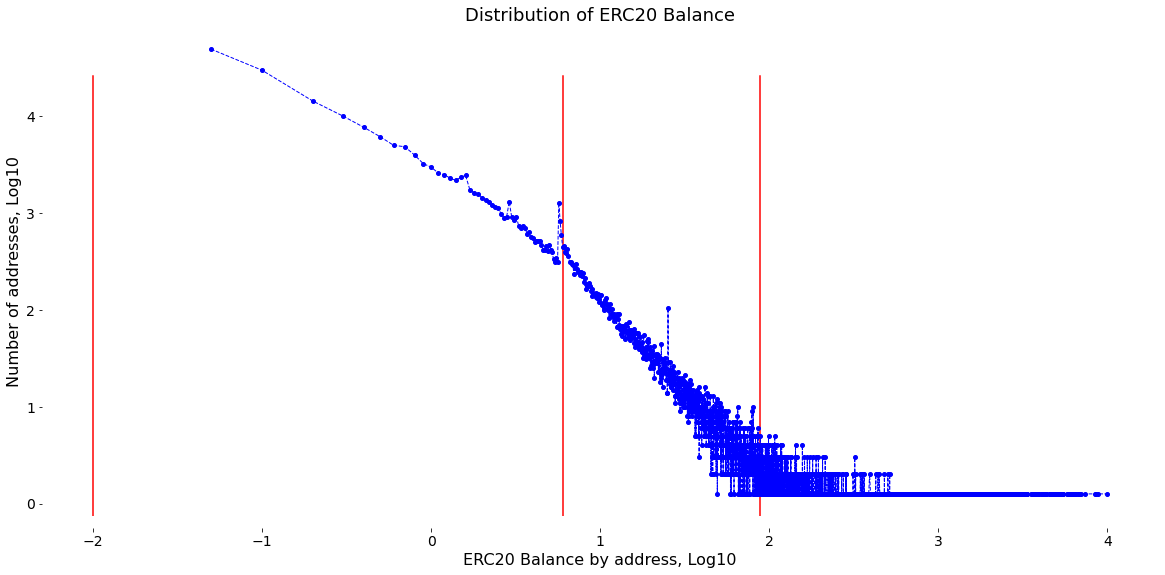

In [8]:
investors_boundary_erc20_balance = \
    grade_boundaries_analysis(
        distribution_df=distribution_by_erc20_balance_df,
        value_column = 'erc20_balance_class',
        value_chart_label = 'ERC20 Balance by address, Log10',
        value_name = 'ERC20 Balance',
        value_transform_func=lambda x: log10(x),
        chart_title = 'Distribution of ERC20 Balance',
        initial_boundary=initial_boundary,
        max_show_value=10000,
        level_line_shift=0)

### Create Distribution Table

In [9]:
query_4 = f'''
    SELECT
        '{INVESTORS_AUDIENCE}' as audience,
        'ERC20 Balance' as segment,
        address,
        CASE
            WHEN sum_eth_balance > {investors_boundary_erc20_balance[2]} THEN 3
            WHEN sum_eth_balance > {investors_boundary_erc20_balance[1]} THEN 2
            WHEN sum_eth_balance > {investors_boundary_erc20_balance[0]} THEN 1
        END
        AS grade,
        sum_eth_balance,
        number_of_tokens
    FROM (
        SELECT
            address,
            count(distinct token_address) as number_of_tokens,
            sum(eth_balance) as sum_eth_balance
        FROM `{PROJECT_ID}.{ERC20_ANALYSIS_DATASET_NAME}.{ERC20_BALANCES_TABLE_NAME}`
        WHERE balance > 0
          AND token_address IN {investors_erc20_tokens_addresses_tuple}
        GROUP BY address)
    WHERE number_of_tokens >= {investors_min_number_of_tokens}

    UNION ALL

    SELECT
        '{CYBERPUNKS_AUDIENCE}' as audience,
        'Owners of the Selected ERC20 Tokens' as segment,
        address,
        3 AS grade,
        sum_eth_balance,
        number_of_tokens
    FROM (
        SELECT
            address,
            count(distinct token_address) as number_of_tokens,
            sum(eth_balance) as sum_eth_balance
        FROM `{PROJECT_ID}.{ERC20_ANALYSIS_DATASET_NAME}.{ERC20_BALANCES_TABLE_NAME}`
        WHERE balance > 0
          AND token_address IN {cyberpunks_erc20_tokens_addresses_tuple}
        GROUP BY address)
'''

if DROP_TABLES:
    drop_table(table_name=ERC20_ANALYSIS_DISTRIBUTION_TABLE_NAME,
               dataset_name=ERC20_ANALYSIS_DATASET_NAME)

if CREATE_TABLES:
    create_table(query=query_4,
                 table_name=ERC20_ANALYSIS_DISTRIBUTION_TABLE_NAME,
                 dataset_name=ERC20_ANALYSIS_DATASET_NAME)

Table erc20_analysis:erc20_analysis_distribution has been deleted.
Table erc20_analysis:erc20_analysis_distribution has been created and filled 244368 rows.
